In [89]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout, \
Conv2D, MaxPooling2D, Flatten, Activation,UpSampling2D,InputLayer, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.nn import relu, softmax
import matplotlib.pyplot as plt
import numpy as np
tensorflow.config.run_functions_eagerly(True)

In [90]:
def load_from_binary(path_x_train, path_y_train,
                    path_x_test, path_y_test,
                    imsize):
    
    with open(path_x_train, 'rb') as read_binary:
        x_train = np.fromfile(read_binary, dtype = np.uint8)
    with open(path_y_train, 'rb') as read_binary:
        y_train = np.fromfile(read_binary, dtype = np.uint8)
    with open(path_x_test, 'rb') as read_binary:
        x_test = np.fromfile(read_binary, dtype = np.uint8)
    with open(path_y_test, 'rb') as read_binary:
        y_test = np.fromfile(read_binary, dtype = np.uint8)
    x_train = np.array(x_train, dtype = 'float32') / 255
    x_test = np.array(x_test, dtype = 'float32') / 255
    x_train = x_train.reshape(-1, imsize * imsize)
    x_test = x_test.reshape(-1, imsize * imsize)
    return x_train, y_train, x_test, y_test
def one_plot(loss, val_loss, acc, val_acc):
    fig, ax = plt.subplots(2, 1, figsize=(20,15))
    ax[0].plot(loss, color = 'r', label = 'loss', linestyle = '--')
    ax[0].plot(val_loss, color = 'g', label = 'val_loss')
    ax[1].plot(acc, color = 'r', label = 'acc', linestyle = '--')
    ax[1].plot(val_acc, color = 'g', label = 'val_acc')
    ax[0].set_ylim((min(min(val_loss),min(loss)), 1.5*max(val_loss + loss)))
    ax[1].set_ylim((min(min(val_acc),min(acc)), 1))
    ax[0].set_ylabel('Loss')
    ax[1].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[1].set_xlabel('Epoch')
    ax[0].legend()
    ax[1].legend()

In [91]:
num_classes = 6
img_rows = img_cols = 64
file_image_train = 'data_train.bin'
file_lable_train = 'label_train.bin'
file_image_test = 'data_test.bin'
file_lable_test = 'label_test.bin'
x_train, y_train, x_test, y_test = load_from_binary(file_image_train, file_lable_train,
                                                   file_image_test, file_lable_test, img_rows)

In [92]:
def one_part(units, x):
    x = Dense(units)(x)
    x = LeakyReLU()(x)
    return Dropout(0.25)(x)

In [93]:
latent_size = 32 # Размер латентного пространста
inp = Input(shape = (64*64))
x = one_part(2048, inp)
x = one_part(1024, x)
x = one_part(512, x)
x = one_part(256, x)
x = one_part(128, x)
x = one_part(64, x)
x = Dense(latent_size)(x)
encoded = LeakyReLU()(x)
x = one_part(64, encoded)
x = one_part(128, x)
x = one_part(256, x)
x = one_part(512, x)
x = one_part(1024, x)
x = one_part(2048, x)
decoded = Dense(64*64, activation = 'sigmoid')(x)
model = Model(inputs = inp, outputs = decoded)
model.compile('adam', loss = 'binary_crossentropy') # nadam
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_52 (InputLayer)       [(None, 4096)]            0         
                                                                 
 dense_84 (Dense)            (None, 2048)              8390656   
                                                                 
 leaky_re_lu_47 (LeakyReLU)  (None, 2048)              0         
                                                                 
 dropout_36 (Dropout)        (None, 2048)              0         
                                                                 
 dense_85 (Dense)            (None, 1024)              2098176   
                                                                 
 leaky_re_lu_48 (LeakyReLU)  (None, 1024)              0         
                                                                 
 dropout_37 (Dropout)        (None, 1024)              0   

In [94]:
def some_plts(imgs):
    fig, axs = plt.subplots(4, 4)
    k = -1
    for i in range(4):
        for j in range(4):
            k += 1
            img = imgs[k].reshape(64, 64)
            axs[i, j].imshow(img, cmap = 'gray')
            axs[i, j].axis('off')
    plt.subplots_adjust(wspace = 1, hspace = 0)
    plt.show()

In [95]:
len_test = len(y_test)
plt_epoch = True
epochs = 10 # Число эпох
for epoch in range(epochs):
    print('epoch:', epoch + 1)
    model.fit(x = x_train, y = x_train)
    # Выводим, если работаем в IPython, Jupyter или Colab
    if plt_epoch and epoch > 0 and epoch % 2 == 0:
        arr_idx = np.random.randint(0, len_test, 16) # class 'numpy.ndarray'
        imgs_for_test = x_test[arr_idx].reshape(16, 64*64) # class 'numpy.ndarray'
        some_plts(imgs_for_test)
        imgs_pedicted = model.predict(imgs_for_test)
        some_plts(imgs_pedicted) # imgs_pedicted.shape = (16, 784)

epoch: 1
 22/113 [====>.........................] - ETA: 17s - loss: 0.2519

KeyboardInterrupt: 

# Data generation in color

In [96]:
import PIL

In [97]:
colors = {
    'white':(255, 255, 255),
    'red':(255, 0, 0),
    'green':(0, 255, 0),
    'yellow':(255, 255, 0),
    'phiolet':(255, 0, 255),
    'blue':(0, 255, 255),
}

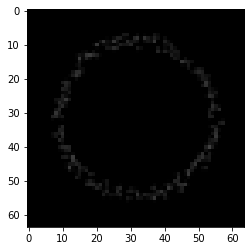

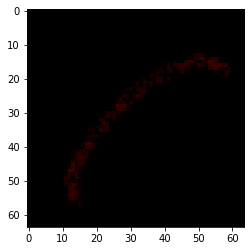

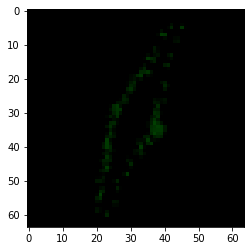

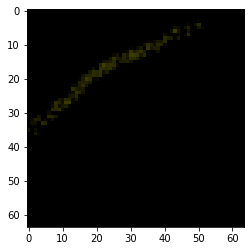

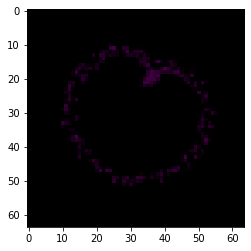

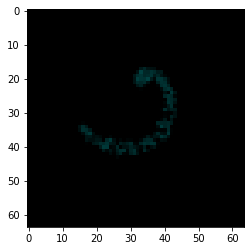

In [98]:
for i, values in enumerate(colors.items()):
    indx = np.flatnonzero(y_train == i)
    new_matrix = np.zeros((64, 64, 3))
    matrix = x_train[indx][0]
    #print(new_matrix[:,:,0])
    for ind, j in enumerate(values[1]):
        if j>0:
            new_matrix[:,:,ind] = matrix.reshape((64,64))*255
    image = PIL.Image.fromarray(new_matrix.astype('uint8'), 'RGB')
    fig, ax = plt.subplots(1,1)
    ax.imshow(image)

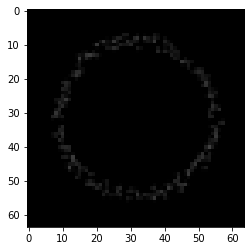

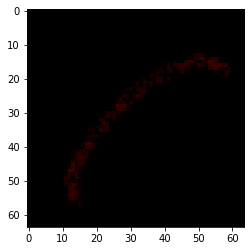

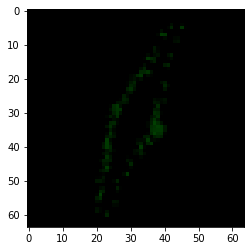

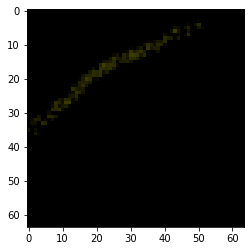

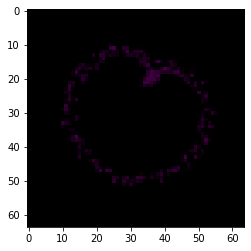

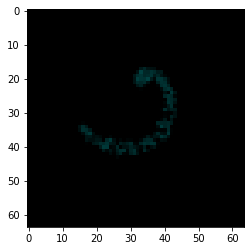

In [99]:
new_matrix = np.zeros((x_train.shape[0], 64, 64, 3))
for i, values in enumerate(colors.items()):
    indx = np.flatnonzero(y_train == i)
    matrix = x_train[indx].reshape((len(indx),64,64))
    for ind, j in enumerate(values[1]):
        if j>0:
            new_matrix[i*(600):(i+1)*600,:,:,ind] = matrix
    image = PIL.Image.fromarray((new_matrix[i*600]*255).astype('uint8'), 'RGB')
    fig, ax = plt.subplots(1,1)
    ax.imshow(image)

In [21]:
latent_size = 32 # Размер латентного пространста
image_shape = (64,64,3)
encoder = Sequential()
encoder.add(InputLayer(image_shape))
encoder.add(Flatten())
encoder.add(Dense(latent_size))
# The decoder
decoder = Sequential()
decoder.add(InputLayer((latent_size,)))
decoder.add(Dense(np.prod(image_shape))) 
decoder.add(Reshape(image_shape))

inp = Input(image_shape)
code = encoder(inp)
dec = decoder(code)

model = Model(inputs = inp, outputs = dec)
model.compile('adam', loss = 'binary_crossentropy') # nadam
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 sequential_2 (Sequential)   (None, 32)                393248    
                                                                 
 sequential_3 (Sequential)   (None, 64, 64, 3)         405504    
                                                                 
Total params: 798,752
Trainable params: 798,752
Non-trainable params: 0
_________________________________________________________________


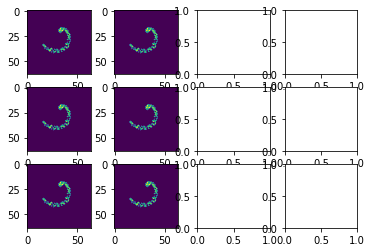

In [48]:
fig, ax = plt.subplots(3,4)
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]-2):
        ax[i][j].imshow(x_train[0].reshape(64,64))

epoch: 1
113/113 [==============================] - 4s 39ms/step - loss: 0.0201
epoch: 2
113/113 [==============================] - 4s 39ms/step - loss: 0.0202
epoch: 3
1/1 [==============================] - 0s 18ms/step
epoch: 4
113/113 [==============================] - 4s 39ms/step - loss: 0.0206
epoch: 5
1/1 [==============================] - 0s 20ms/step
epoch: 6
113/113 [==============================] - 4s 38ms/step - loss: 0.0201
epoch: 7
1/1 [==============================] - 0s 21ms/step
epoch: 8
113/113 [==============================] - 6s 57ms/step - loss: 0.0201
epoch: 9
1/1 [==============================] - 0s 20ms/step
epoch: 10
113/113 [==============================] - 5s 49ms/step - loss: 0.0205
epoch: 11
1/1 [==============================] - 0s 31ms/step
epoch: 12
113/113 [==============================] - 5s 44ms/step - loss: 0.0216
epoch: 13
1/1 [==============================] - 0s 19ms/step
epoch: 14
113/113 [==============================] - 5s 44ms/step - lo

113/113 [==============================] - 5s 48ms/step - loss: 0.0204
epoch: 37
1/1 [==============================] - 0s 23ms/step
epoch: 38
113/113 [==============================] - 5s 42ms/step - loss: 0.0203
epoch: 39
1/1 [==============================] - 0s 20ms/step
epoch: 40
113/113 [==============================] - 7s 61ms/step - loss: 0.0202
epoch: 41
1/1 [==============================] - 0s 21ms/step
epoch: 42
113/113 [==============================] - 6s 49ms/step - loss: 0.0205
epoch: 43
113/113 [==============================] - 5s 45ms/step - loss: 0.0208


C:\Users\Windows\AppData\Local\Temp/ipykernel_17072/3982068400.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(3,4)


1/1 [==============================] - 0s 23ms/step
epoch: 44
113/113 [==============================] - 5s 47ms/step - loss: 0.0207
epoch: 45
1/1 [==============================] - 0s 33ms/step
epoch: 46
113/113 [==============================] - 5s 42ms/step - loss: 0.0203
epoch: 47
1/1 [==============================] - 0s 27ms/step
epoch: 48
113/113 [==============================] - 6s 55ms/step - loss: 0.0205
epoch: 49
1/1 [==============================] - 0s 34ms/step
epoch: 50
113/113 [==============================] - 6s 53ms/step - loss: 0.0204
epoch: 51
1/1 [==============================] - 0s 23ms/step
epoch: 52
113/113 [==============================] - 5s 46ms/step - loss: 0.0202
epoch: 53
1/1 [==============================] - 0s 22ms/step
epoch: 54
113/113 [==============================] - 5s 43ms/step - loss: 0.0200
epoch: 55
1/1 [==============================] - 0s 17ms/step
epoch: 56
113/113 [==============================] - 6s 54ms/step - loss: 0.0204
epoch: 57

1/1 [==============================] - 0s 30ms/step
epoch: 78
113/113 [==============================] - 5s 47ms/step - loss: 0.0204
epoch: 79
1/1 [==============================] - 0s 24ms/step
epoch: 80
113/113 [==============================] - 5s 46ms/step - loss: 0.0206
epoch: 81
1/1 [==============================] - 0s 40ms/step
epoch: 82
113/113 [==============================] - 6s 55ms/step - loss: 0.0204
epoch: 83
1/1 [==============================] - 0s 22ms/step
epoch: 84
113/113 [==============================] - 7s 59ms/step - loss: 0.0208
epoch: 85
1/1 [==============================] - 0s 33ms/step
epoch: 86
113/113 [==============================] - 6s 52ms/step - loss: 0.0202
epoch: 87
1/1 [==============================] - 0s 23ms/step
epoch: 88
113/113 [==============================] - 5s 46ms/step - loss: 0.0200
epoch: 89
1/1 [==============================] - 0s 22ms/step
epoch: 90
113/113 [==============================] - 5s 48ms/step - loss: 0.0206
epoch: 91

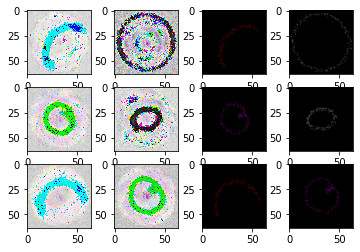

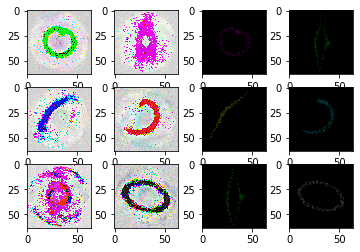

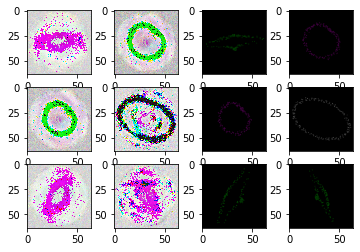

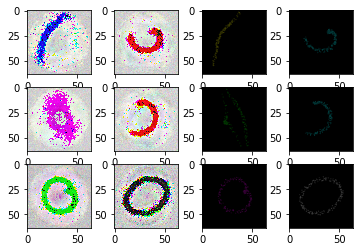

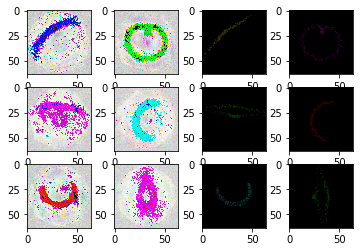

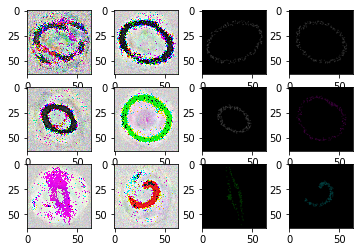

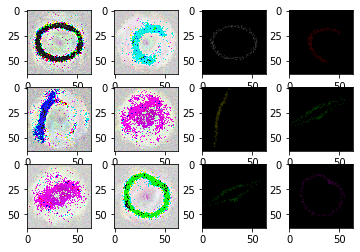

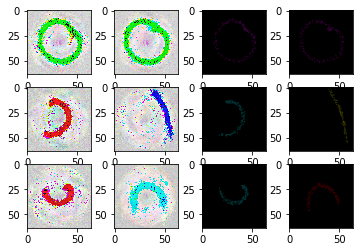

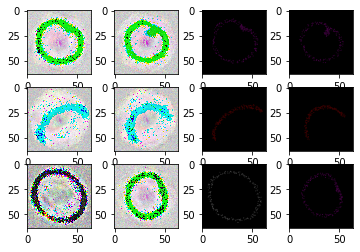

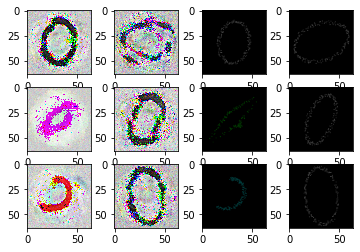

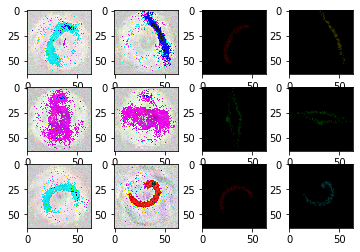

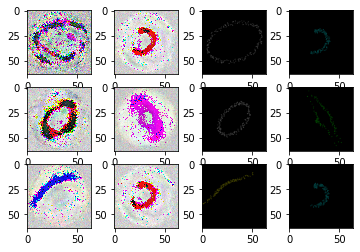

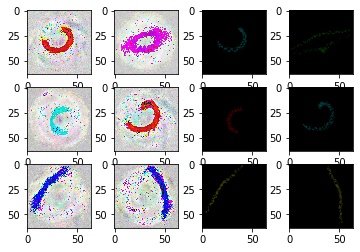

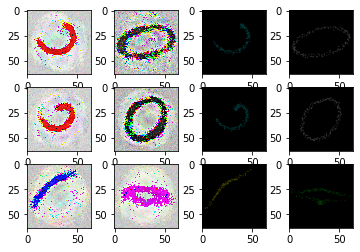

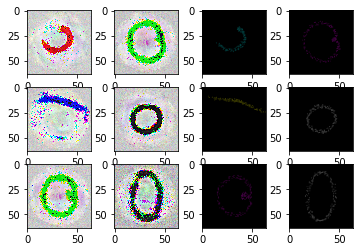

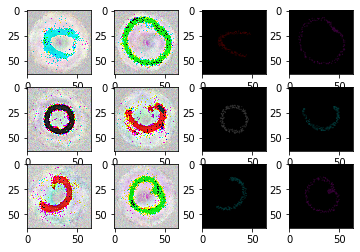

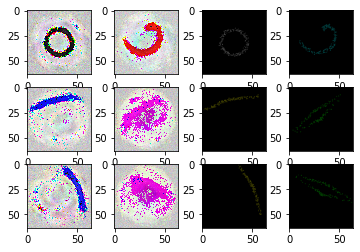

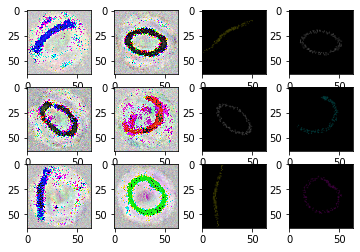

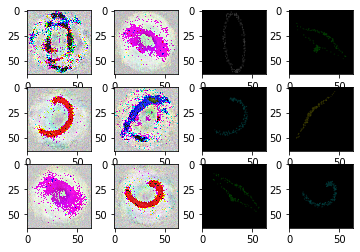

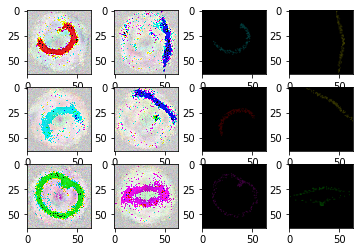

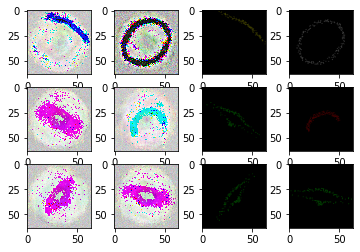

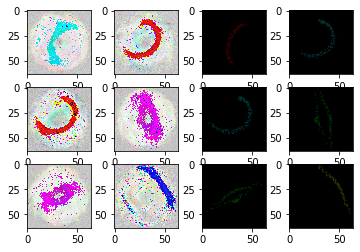

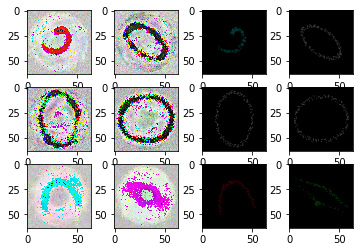

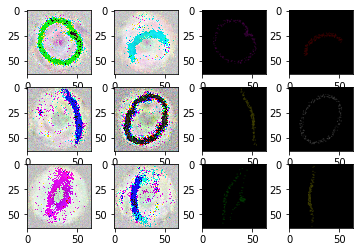

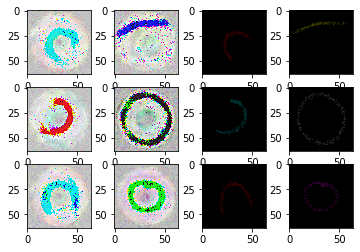

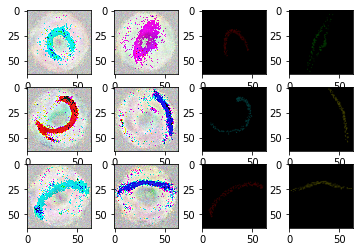

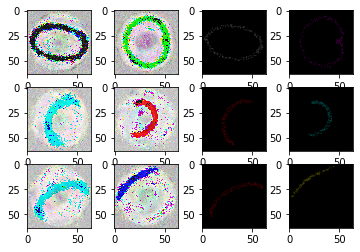

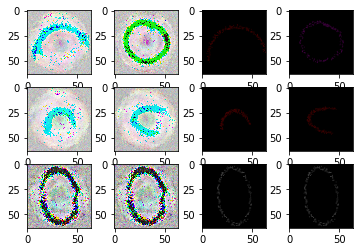

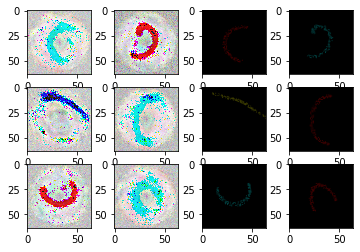

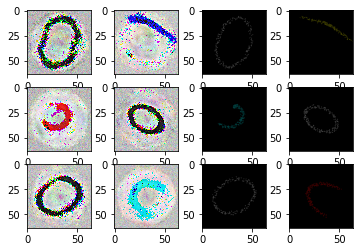

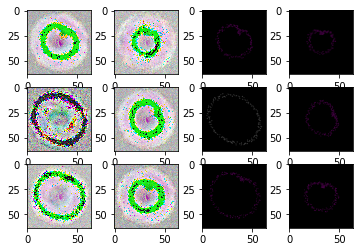

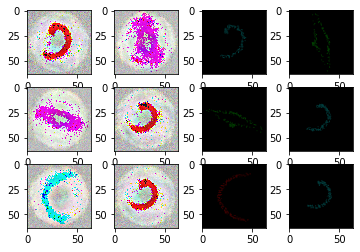

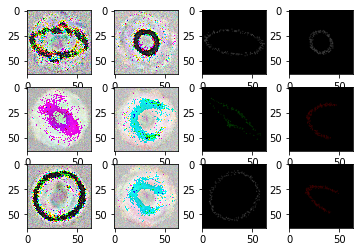

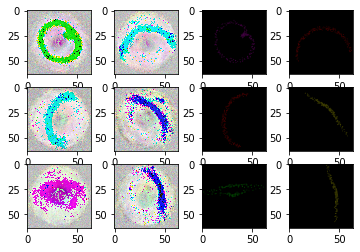

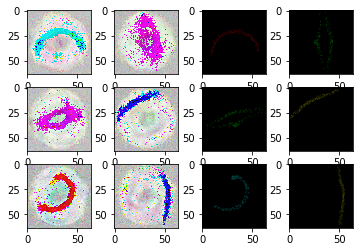

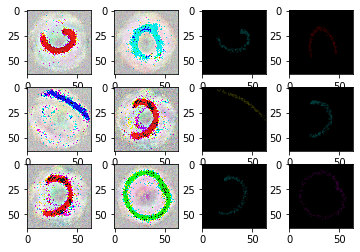

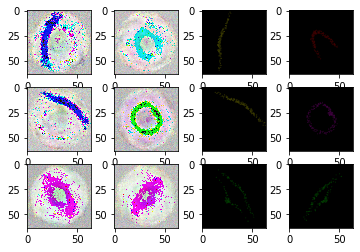

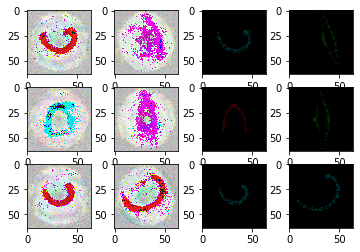

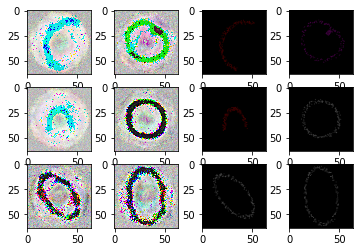

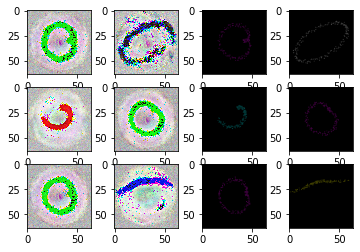

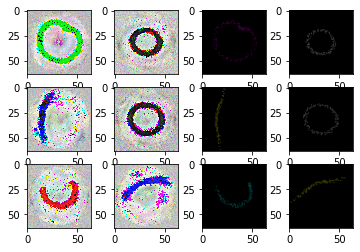

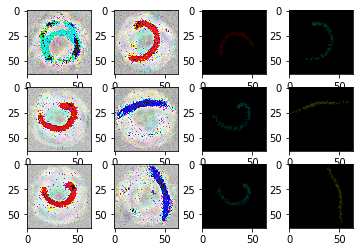

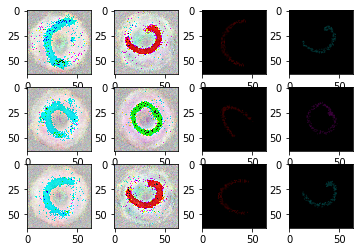

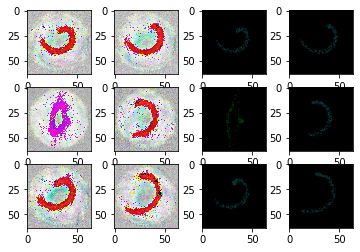

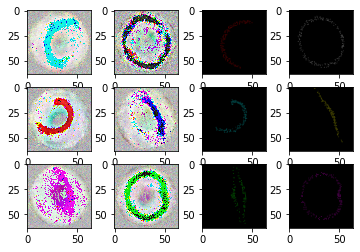

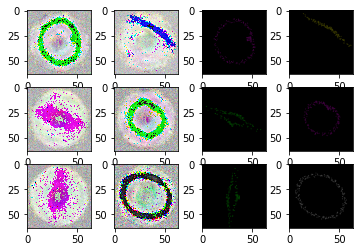

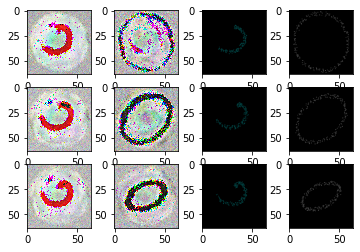

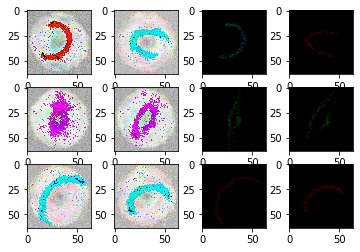

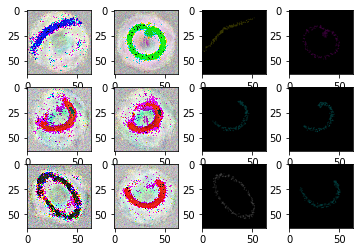

In [56]:
%matplotlib inline
len_test = len(y_train)
plt_epoch = True
epochs = 100 # Число эпох
for epoch in range(epochs):
    print('epoch:', epoch + 1)
    model.fit(x = new_matrix, y = new_matrix)
    # Выводим, если работаем в IPython, Jupyter или Colab
    if plt_epoch and epoch > 0 and epoch % 2 == 0:
        fig, ax = plt.subplots(3,4)
        for i in range(ax.shape[0]):
            for j in range(ax.shape[1]-2):
                idxs = np.flatnonzero(y_train == i)
                idxs = np.random.choice(idxs, 1, replace=False)
                imgs_for_test = new_matrix[idxs, :,:,:]
                img_pred = model.predict(imgs_for_test)
                #print(imgs_for_test.shape)
                imgs_for_test = PIL.Image.fromarray((imgs_for_test[0]*255).astype('uint8'), 'RGB')
                img_pred = PIL.Image.fromarray((img_pred[0]*255).astype('uint8'), 'RGB')
                ax[i][j].imshow(img_pred)
                ax[i][j+2].imshow(imgs_for_test)

In [58]:
model.save("simple_autoencoder.model")

INFO:tensorflow:Assets written to: simple_autoencoder.model\assets


In [110]:
latent_size = 32 # Размер латентного пространста
inp = Input(shape = (64*64*3))
x = one_part(4096, inp)
#x = one_part(2048, x)
x = one_part(1024, x)
#x = one_part(512, x)
x = one_part(256, x)
x = one_part(128, x)
#x = one_part(64, x)
x = Dense(latent_size)(x)
encoded = LeakyReLU()(x)
x = one_part(64, encoded)
#x = one_part(128, x)
x = one_part(256, x)
#x = one_part(512, x)
x = one_part(1024, x)
#x = one_part(2048, x)
x = one_part(4096, x)
decoded = Dense(64*64*3, activation = 'sigmoid')(x)
model = Model(inputs = inp, outputs = decoded)
model.compile('adam', loss = 'binary_crossentropy') # nadam
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_55 (InputLayer)       [(None, 12288)]           0         
                                                                 
 dense_130 (Dense)           (None, 4096)              50335744  
                                                                 
 leaky_re_lu_90 (LeakyReLU)  (None, 4096)              0         
                                                                 
 dropout_76 (Dropout)        (None, 4096)              0         
                                                                 
 dense_131 (Dense)           (None, 1024)              4195328   
                                                                 
 leaky_re_lu_91 (LeakyReLU)  (None, 1024)              0         
                                                                 
 dropout_77 (Dropout)        (None, 1024)              0   

In [111]:
new_matrix.reshape((3600, 64*64*3)).shape

(3600, 12288)

In [ ]:
len_test = len(y_train)
plt_epoch = True
epochs = 1 # Число эпох
new_matrix = new_matrix.reshape((3600, 64*64*3))
for epoch in range(epochs):
    print('epoch:', epoch + 1)
    model.fit(x = new_matrix, y = new_matrix,batch_size=128)
    # Выводим, если работаем в IPython, Jupyter или Colab
    #if plt_epoch and epoch > 0 and epoch % 2 == 0:
    fig, ax = plt.subplots(3,4)
    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]-2):
            idxs = np.flatnonzero(y_train == i)
            #print(idxs)
            idxs = np.random.choice(idxs, 1, replace=False)
            #print(idxs)
            imgs_for_test = new_matrix[idxs]
            #print(imgs_for_test.shape)
            img_pred = model.predict(imgs_for_test)
            #print(imgs_for_test.shape)
            imgs_for_test = PIL.Image.fromarray((imgs_for_test.reshape(64,64,3)*300).astype('uint8'), 'RGB')
            img_pred = PIL.Image.fromarray((img_pred*300).reshape(64,64,3).astype('uint8'), 'RGB')
            ax[i][j].imshow(img_pred)
            ax[i][j+2].imshow(imgs_for_test)

epoch: 1
21/29 [====================>.........] - ETA: 9s - loss: 0.0213 

In [ ]:
img = np.random.uniform(0, 1, 16 * 64*64).reshape(16, 64*64)
imgs_pedicted = model.predict(img)
some_plts(imgs_pedicted)

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(64, 64, 64),
                 padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='softmax'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

In [ ]:
model = tensorflow.keras.Sequential([
                          Dense(100, activation = 'relu'),
                          Dense(50, activation= 'relu'),
                          Dense(50, activation= 'relu'),
                          Dense(1, activation = 'softmax')
])
model.build(input_shape=(200,200,200))
model.summary()

In [ ]:
model = Sequential() # CNN构建
model.add(Conv2D(
input_shape=(200, 200, 4),
# input_shape=(1, Width, Height),
filters=16,
kernel_size=3,
strides=1,
padding='same',
data_format='channels_last',
name='CONV_1'
))
model.summary()

In [ ]:
def one_part(units, x):
    x = Dense(units)(x)
    x = LeakyReLU()(x)
    return Dropout(0.25)(x)

In [ ]:
np.zeros((64*64, 3)).shape

In [ ]:
latent_size = 32 # Размер латентного пространста
inp = Input(shape=(64*64, 3))
x = one_part(2048, inp)
x = one_part(1024, x)
x = one_part(512, x)
x = one_part(256, x)
x = one_part(128, x)
x = one_part(64, x)
x = Dense(latent_size)(x)
encoded = LeakyReLU()(x)
x = one_part(64, encoded)
x = one_part(128, x)
x = one_part(256, x)
x = one_part(512, x)
x = one_part(1024, x)
x = one_part(2048, x)
decoded = Dense(64*64, activation = 'sigmoid')(x)
model = Model(inputs = inp, outputs = decoded)
model.compile('adam', loss = 'binary_crossentropy') # nadam
model.summary()

In [ ]:
model = Sequential()

#1st convolution layer
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#2nd convolution layer
model.add(Conv2D(2,(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
#-------------------------
#3rd convolution layer
model.add(Conv2D(2,(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(UpSampling2D((2, 2)))

#4rd convolution layer
model.add(Conv2D(16,(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(UpSampling2D((2, 2)))

#-------------------------

model.add(Conv2D(3,(3, 3), padding='same'))
model.add(Activation('sigmoid'))

model.summary()


In [ ]:
model = Sequential([
    Flatten(input_shape=(64, 64, 3)),
    Dense(128, activation=relu),
    Dense(10, activation=softmax)
])
model.add()